## Task A - Iris data

In [ ]:
# Importing libraries
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

In [ ]:
# Upload the Iris dataset:
from google.colab import files
uploaded = files.upload()

# Load the data set in a Pandas Data Frame:
iris = pd.read_csv("Unit06 iris.csv")

Saving Unit06 iris.csv to Unit06 iris (1).csv


In [ ]:
# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(iris.head())

# Preprocessing: Extract only the numerical features for clustering
features = iris.iloc[:, :-1]  # All rows, excluding the 'species' column
labels = iris['species']      # Actual labels

# Standardizing the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Applying K-Means clustering for K=3
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
iris['cluster'] = kmeans.fit_predict(scaled_features)

# Map clusters to species to check similarity
# Cluster mapping might differ; mapping based on visual inspection or metrics
def map_cluster_to_species(cluster_labels, true_labels):
    mapping = {}
    for cluster in np.unique(cluster_labels):
        # Find the most common species in this cluster
        species = true_labels[cluster_labels == cluster]
        mapping[cluster] = species.mode()[0]
    return mapping

# Assign clusters to species
iris['mapped_cluster'] = iris['cluster'].map(map_cluster_to_species(iris['cluster'], iris['species']))

# Evaluation: Compare clusters with true labels
ari = adjusted_rand_score(labels, iris['cluster'])
nmi = normalized_mutual_info_score(labels, iris['cluster'])

print("\nCluster evaluation metrics:")
print(f"Adjusted Rand Index (ARI): {ari}")
print(f"Normalized Mutual Information (NMI): {nmi}")

# Display first few rows with clusters
print("\nDataset with clustering results:")
print(iris.head())

First few rows of the dataset:
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

Cluster evaluation metrics:
Adjusted Rand Index (ARI): 0.6201351808870379
Normalized Mutual Information (NMI): 0.6594868927249182

Dataset with clustering results:
   sepal_length  sepal_width  petal_length  petal_width species  cluster  \
0           5.1          3.5           1.4          0.2  setosa        1   
1           4.9          3.0           1.4          0.2  setosa        1   
2           4.7          3.2           1.3          0.2  setosa        1   
3           4.6          3.1           1.5          0.2  setosa        1   
4           5.0          3.6           1

**Interpretation:**

The Adjusted Rand Index (ARI) ranges from -1 to 1. This means that the calculated ARI value of about 0.62 stands for a clustering result that is moderately good, taking into consideration that 0 would be expected with random association to clusters and 1 would be perfect clustering.

Normalized Mutual Information (NMI) values range from 0 to 1 which means that the NMI value of about 0.66 is about as good as the ARI for this clustering result, also showing a result that is moderately good.

## Task B - Wine data

In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

In [ ]:
# Upload the Wine dataset:
from google.colab import files
uploaded = files.upload()

# Load the data set in a Pandas Data Frame:
wine = pd.read_csv("Unit06 wine.csv")

Saving Unit06 wine.csv to Unit06 wine (1).csv


In [ ]:
# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(wine.head())

# Preprocessing: Extract features and labels
# Assuming the wine type column is named 'Wine' based on the global variables
features = wine.drop(columns=['Wine']) # All columns except 'Wine' (wine type)
labels = wine['Wine']       # Actual wine class labels

# Standardizing the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Applying K-Means clustering for K=3
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
wine['cluster'] = kmeans.fit_predict(scaled_features)

# Map clusters to classes for comparison
def map_cluster_to_class(cluster_labels, true_labels):
    mapping = {}
    for cluster in np.unique(cluster_labels):
        # Find the most common class in this cluster
        cls = true_labels[cluster_labels == cluster]
        mapping[cluster] = cls.mode()[0]
    return mapping

# Create the mapping and assign classes to clusters
wine['mapped_cluster'] = wine['cluster'].map(map_cluster_to_class(wine['cluster'], wine['Wine'])) #changed from 'Class' to 'Wine'


# Evaluation: Compare clusters with true labels
ari = adjusted_rand_score(labels, wine['cluster'])
nmi = normalized_mutual_info_score(labels, wine['cluster'])

print("\nCluster evaluation metrics:")
print(f"Adjusted Rand Index (ARI): {ari}")
print(f"Normalized Mutual Information (NMI): {nmi}")

# Display first few rows with clustering results
print("\nDataset with clustering results:")
print(wine.head())

First few rows of the dataset:
   Wine  Alcohol  Malic.acid   Ash   Acl   Mg  Phenols  Flavanoids  \
0     1    14.23        1.71  2.43  15.6  127     2.80        3.06   
1     1    13.20        1.78  2.14  11.2  100     2.65        2.76   
2     1    13.16        2.36  2.67  18.6  101     2.80        3.24   
3     1    14.37        1.95  2.50  16.8  113     3.85        3.49   
4     1    13.24        2.59  2.87  21.0  118     2.80        2.69   

   Nonflavanoid.phenols  Proanth  Color.int   Hue    OD  Proline  cluster  
0                  0.28     2.29       5.64  1.04  3.92     1065        2  
1                  0.26     1.28       4.38  1.05  3.40     1050        2  
2                  0.30     2.81       5.68  1.03  3.17     1185        2  
3                  0.24     2.18       7.80  0.86  3.45     1480        2  
4                  0.39     1.82       4.32  1.04  2.93      735        2  

Cluster evaluation metrics:
Adjusted Rand Index (ARI): 0.8974949815093207
Normalized Mutual

**Interpretation:**

The ARI value of about 0.90 and the NMI value of about 0.88 both point at a quite good clustering in this case as both numbers lie close to the maximum value of 1.

## Task C - WeatherAUS data

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Upload the WeatherAUS dataset:
from google.colab import files
uploaded = files.upload()

weather = pd.read_csv("Unit06 weatherAUS.csv")

Saving Unit06 weatherAUS.csv to Unit06 weatherAUS.csv


First few rows of the dataset:
   MinTemp  MaxTemp  Rainfall  WindGustSpeed  WindSpeed9am  WindSpeed3pm  \
0     13.4     22.9       0.6           44.0          20.0          24.0   
1      7.4     25.1       0.0           44.0           4.0          22.0   
2     12.9     25.7       0.0           46.0          19.0          26.0   
3      9.2     28.0       0.0           24.0          11.0           9.0   
4     17.5     32.3       1.0           41.0           7.0          20.0   

   Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Temp9am  Temp3pm  \
0         71.0         22.0       1007.7       1007.1     16.9     21.8   
1         44.0         25.0       1010.6       1007.8     17.2     24.3   
2         38.0         30.0       1007.6       1008.7     21.0     23.2   
3         45.0         16.0       1017.6       1012.8     18.1     26.5   
4         82.0         33.0       1010.8       1006.0     17.8     29.7   

  RainToday RainTomorrow  
0        No           No  
1      

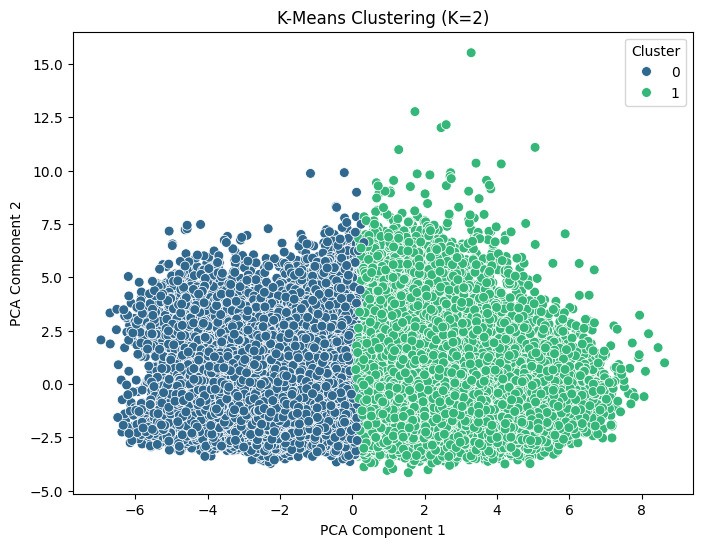

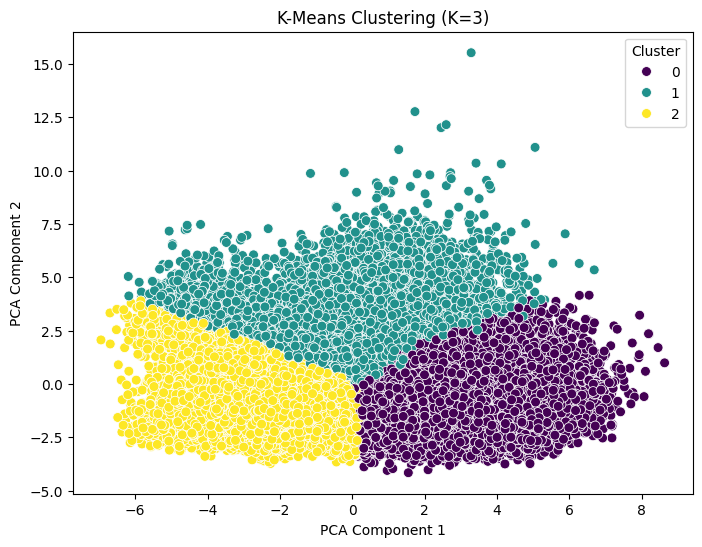

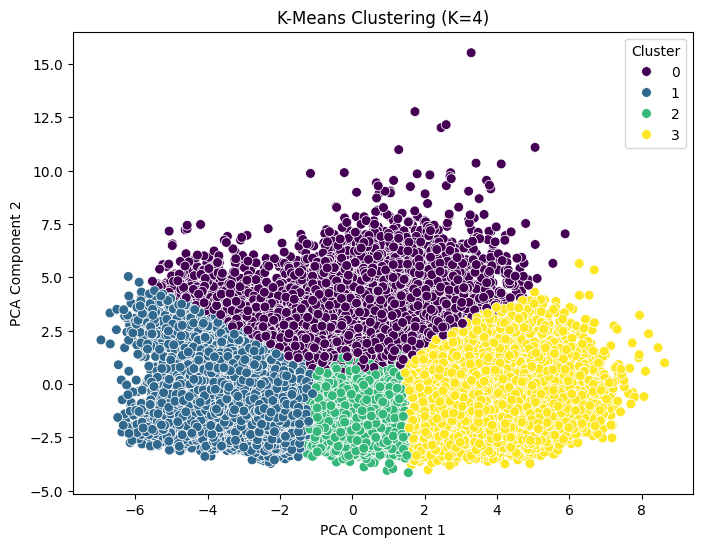

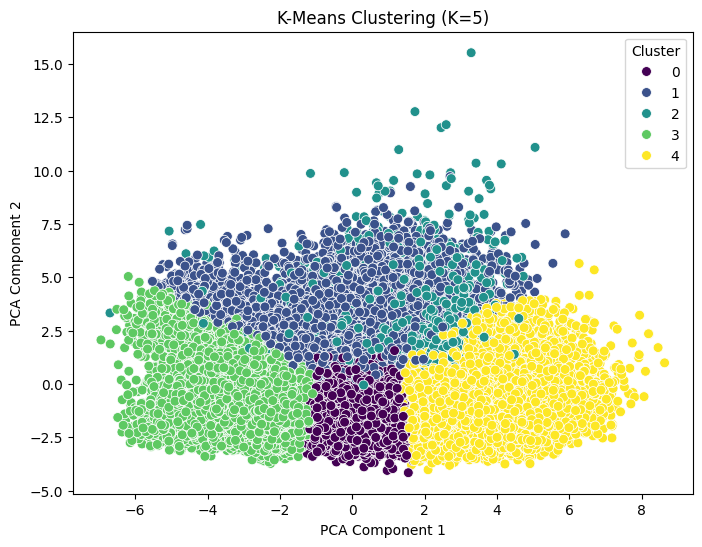

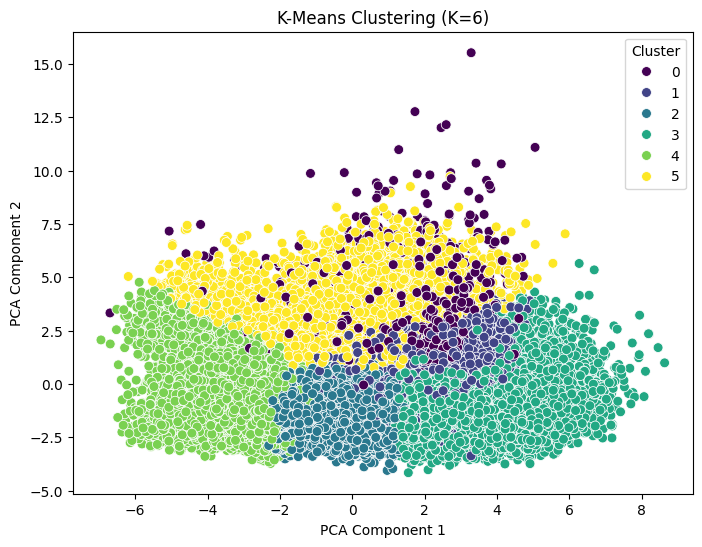

In [ ]:
# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(weather.head())

# Check for missing values
missing_values = weather.isnull().sum()

# Display the number of missing values for each column
print("\nNumber of missing values in each column:")
print(missing_values)

# Preprocessing the data
# Drop columns with many missing values and irrelevant features
columns_to_drop = ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']
weather_cleaned = weather.drop(columns=columns_to_drop, errors='ignore')

# Handle missing values by filling with the median
weather_cleaned.fillna(weather_cleaned.median(), inplace=True)

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(weather_cleaned.select_dtypes(include=[np.number]))

# Dimensionality reduction for visualization
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# K-Means clustering and visualization for K=2 to K=6
for k in range(2, 7):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    clusters = kmeans.fit_predict(scaled_data)

    # Scatter plot of clusters
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=clusters, palette='viridis', s=50)
    plt.title(f"K-Means Clustering (K={k})")
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.legend(title="Cluster")
    plt.show()

**Interpretation:**

The visualisation shows that a clear clustering with clearly defined destinctions between the groups exists for K = 2 up until K = 4.

For K = 5 and K = 6 we see that no clearly distinguished clusters are created anymore. Here, in some parts the clusters get mixed up which makes them not useful.